<a href="https://colab.research.google.com/github/alejandra2826/Alejandra-Trujillo/blob/Practica2/practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TOPICO DE LA INDUTRIA 1**
**ALEJANDRA ELIZABETH Trujillo Navarro**
**Practica # 2 **

#**MODULES**


In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable


#**CLASSES**

In [39]:
# Nota: Esta clase la importaremos junto con el segundo bloque de modulos
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)
   # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

# Actividad 1: Lévy distribution - N Curvas (3 pts)


In [21]:
# Parametros de inicio
a = 3.0
c = 0
n_curves = 4

# Valor de resolution
resolution = 500
aux_domain = np.linspace(a+5, a-5, resolution)


values = np.arange(0.1, 2.1, 0.1)
alpha_vals = np.random.choice(values, size=n_curves, replace=False)
alpha_vals = np.sort(alpha_vals)
levy_curves = {}

for i in range(n_curves):
  levy_pdf = np.array(levy_stable.pdf(aux_domain, alpha=alpha_vals[i], beta=c, loc=a))
  levy_curves['Levy_'+str(np.round(alpha_vals[i],1))] = levy_pdf




In [22]:
fig_exponweib_pdf = go.Figure()

for name, levy_pdf in levy_curves.items():
  fig_exponweib_pdf.add_trace(go.Scatter(x = aux_domain,
                                    y = levy_pdf,
                                    marker = dict(size=2),
                                    mode = 'lines',
                                    name = name,
                                    showlegend = True))


#Set title
fig_exponweib_pdf.update_layout(title_text = 'Lévy distribution - N Curvas')
#Show PDF curves
fig_exponweib_pdf.show()


#**Actividad 2: Lévy distribution - Histograma + Curva (4 pts)**

In [33]:

sample_size = 1500
al = 1.9
be = 0.5
m = 0.0

#Aux domain var for Levy PDF
aux_domain = np.linspace(m-5, m+5, 500)

r = levy_stable.rvs(al, be, size=sample_size, loc=m)
levy_pdf = np.array(levy_stable.pdf(aux_domain, alpha=al, beta=be, loc=m))

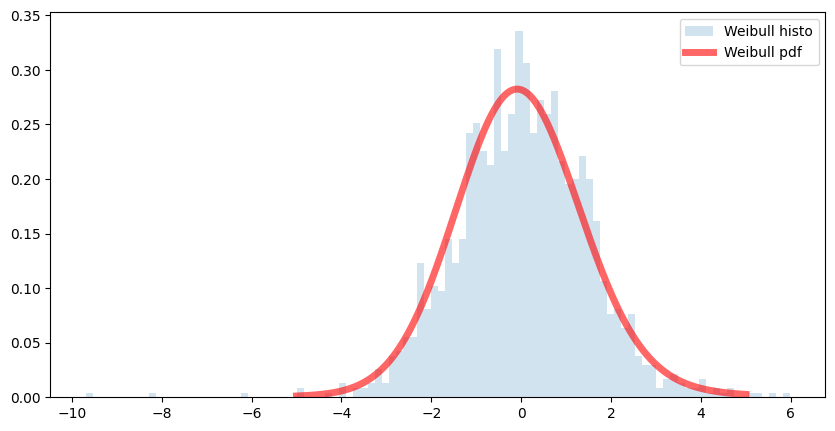

In [34]:
fig, ax = plt.subplots(1,1)

fig.set_figheight(5)
fig.set_figwidth(10)

ax.hist(r, bins=100, density= True, histtype='stepfilled', alpha=0.2, label='Weibull histo')

ax.plot(aux_domain, levy_pdf, 'r-', lw=5, alpha=0.6, label='Weibull pdf')

# Desplegar leyendas
ax.legend(loc='best')
plt.show()

#**Actividad 3: Lévy flight - Vec2d - 1 Trayectoria**

In [50]:
#init param
a = 1.9
b = 0.5

CRW_exponent = 0.3

#init variables
n_steps = 1000
s_pos = [0,0]
speed = 6

# Init velocity vector
velocity = Vec2d(speed,0)

#Brownian Walker object initialization
BM_2d = pd.DataFrame([{'x_pos':s_pos[0], 'y_pos':s_pos[1]}])

for i in range(1,n_steps):
  turn_angle = wrapcauchy.rvs(c=CRW_exponent)
  step_size = levy_stable.rvs(alpha=a, beta=b)
  velocity = velocity.rotated(turn_angle)

  temp = pd.DataFrame([{'x_pos':BM_2d.x_pos[i -1 ]+(velocity.x*step_size), 'y_pos':BM_2d.y_pos[i - 1]+(velocity.y*step_size)}])
  BM_2d = pd.concat([BM_2d, temp], ignore_index = True)

time = 10
times_aux = np.linspace(0,time,n_steps)

In [52]:
fig_3d = go.Figure()

fig_3d.add_trace(go.Scatter3d(x=BM_2d.x_pos,
                            y=BM_2d.y_pos,
                            z=times_aux,
                            marker=dict(size=2),
                            line=dict(width=2),
                            mode='lines',
                            name='levy',
                            showlegend=True))

fig_3d.update_layout(scene=dict(
                    xaxis_title='x_pos',
                    yaxis_title='y_pos',
                    zaxis_title='Time'))

fig_3d.show()

#**Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)**

In [ ]:
#init_parameters
n_steps = 500
s_pos = 0
spped = 6
n_tray = 10

# init DATA FRAME
CRW_df = pd.DataFrame(columns=['Cauchy', 'x_pos', 'y_pos'])

for tray in range(n_tray):
  CRW_exponent = np.random.uniform(low=0, high=1)
  velocity = Vec2d(speed,0)
  temp = np.ones(shape=(n_steps,2))*s_pos


